<a href="https://colab.research.google.com/github/mikful/audio-app-mf-ct/blob/master/model_colab_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Audio classification of 134 bird species using fastai2_audio

This notebook investigates the use of the fastai V2 audio library for the classification of the calls of 134 bird species found within Chingaza National Park, Colombia.

All recordings used for this have been taken from xeno-canto.

In [0]:
# See runtime gpu info
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Wed Apr 22 20:19:17 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## Mount Google drive and Unzip data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -qq  "/content/drive/My Drive/Machine_Learning/My_Projects/19006 - Birds of Quinchaue Audio Classifier/Birds_of_Quinchaue_Audio_134_Species.zip"  

# Installing `fastai2` and the `fastai2_audio` library:


In [0]:
! pip install fastai2

     |████████████████████████████████| 184kB 6.3MB/s 


In [0]:
! pip install git+https://github.com/rbracco/fastai2_audio.git

  Cloning https://github.com/rbracco/fastai2_audio.git to /tmp/pip-req-build-h0qz31up
  Running command git clone -q https://github.com/rbracco/fastai2_audio.git /tmp/pip-req-build-h0qz31up
  Using cached https://files.pythonhosted.org/packages/13/70/54e9fb010fe1547bc4774716f11ececb81ae5b306c05f090f4461ee13205/torch-1.5.0-cp36-cp36m-manylinux1_x86_64.whl
  Created wheel for fastai2-audio: filename=fastai2_audio-0.0.1-cp36-none-any.whl size=16068 sha256=268f1c1add3d2b0cd308b945484bb2e28250ff43ef509d86d4395d04dba60cfc
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_mppid2/wheels/42/51/03/0ed4c6b3214b11da84937bfbd35812b095cdaf8e543820922d
Successfully built fastai2-audio
ERROR: torchvision 0.5.0 has requirement torch==1.4.0, but you'll have torch 1.5.0 which is incompatible.
  Found existing installation: torch 1.4.0
    Uninstalling torch-1.4.0:
      Successfully uninstalled torch-1.4.0


In [0]:
import torch
print(torch.__version__)

1.5.0


**Import fastai V2 audio**

In [0]:
from fastai2.vision.all import *
from fastai2_audio.core import *
from fastai2_audio.augment import *

In [0]:
data_folder = Path('/content/content/Birds_of_Quinchaue_Audio_134_Species')
print(data_folder)
print(os.listdir(data_folder)[:5])

/content/content/Birds_of_Quinchaue_Audio_134_Species
['Rufous Antpitta', 'Ruddy Duck', 'Golden-crowned Tanager', 'White-banded Tyrannulet', 'Bogota Rail']


In [0]:
audio_extensions[:5]

('.aif', '.aifc', '.aiff', '.au', '.m3u')

In [0]:
fnames = get_files(data_folder, extensions=audio_extensions)

In [0]:
fnames[:5]

(#5) [Path('/content/content/Birds_of_Quinchaue_Audio_134_Species/Rufous Antpitta/RufousAntpitta_235762.mp3'),Path('/content/content/Birds_of_Quinchaue_Audio_134_Species/Rufous Antpitta/RufousAntpitta_379393.mp3'),Path('/content/content/Birds_of_Quinchaue_Audio_134_Species/Rufous Antpitta/RufousAntpitta_322052.mp3'),Path('/content/content/Birds_of_Quinchaue_Audio_134_Species/Rufous Antpitta/RufousAntpitta_235765.mp3'),Path('/content/content/Birds_of_Quinchaue_Audio_134_Species/Rufous Antpitta/RufousAntpitta_455169.mp3')]

In [0]:
lbl = parent_label(fnames[1])
lbl

'Rufous Antpitta'

In [0]:
# Convert any audio file to a tensor with `AudioTensor` and view
at = AudioTensor.create(fnames[1])
at, at.shape

(AudioTensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -5.6423e-05,
          -3.3854e-04, -1.0755e-05],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ..., -5.6423e-05,
          -3.3854e-04, -1.0755e-05]]), torch.Size([2, 375552]))

ParameterError: ignored

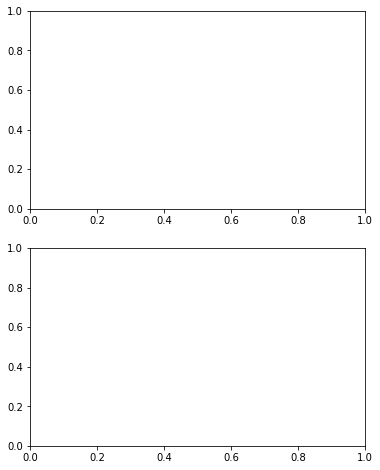

In [0]:
at.show()

# Audio EDA
First, we should consider the following aspects of our data:

* duration
* sample rates
* bit depths

In [0]:
## Create pandas dataframe containing all audio metadata
# using for loops and appending
%%time
import torchaudio
from tqdm import tqdm_notebook as tqdm

audio_dict = {}
filenames = []
labels = []
durations = []
sample_rates = []
channels = []
encodings = []

for f in tqdm(fnames):
  si, ei = torchaudio.info(str(f))
  sr, channel, encoding = si.rate, si.channels, ei.encoding
  waveform, sample_rate = torchaudio.load(f)
  duration = round(waveform.size()[1]/sample_rate)
  
  filenames.append(str(f.name))
  labels.append(str(f.parts[-2])) # grab label from file folder
  durations.append(duration)
  sample_rates.append(sample_rate)
  channels.append(channel)
  encodings.append(str(encoding).split('_')[-1])
  

audio_dict = {'filename': filenames, 'label': labels, 'duration': durations, 
              'sample rate': sample_rates, 'channels': channels, 'encoding': encodings}
df = pd.DataFrame.from_dict(audio_dict)
df.set_index('filename',inplace = True)


In [0]:
# view and export dataframe to csv for future use
df = df.reset_index()
df.head(10)

In [0]:
df.to_csv("/content/drive/My Drive/Machine_Learning/My_Projects/19006 - Birds of Quinchaue Audio Classifier/data_info.csv")

In [0]:
df = pd.read_csv("/content/drive/My Drive/Machine_Learning/My_Projects/19006 - Birds of Quinchaue Audio Classifier/data_info.csv")

In [0]:
df.head(10)

,filename,label,duration,sample rate,channels,encoding
0,SparklingVioletear_336002.mp3,Sparkling Violetear,56,44100,2,MP3
1,SparklingVioletear_148356.mp3,Sparkling Violetear,91,44100,2,MP3
2,SparklingVioletear_94510.mp3,Sparkling Violetear,15,44100,1,MP3
3,SparklingVioletear_446943.mp3,Sparkling Violetear,4,44100,2,MP3
4,SparklingVioletear_344350.mp3,Sparkling Violetear,48,32000,2,MP3
5,SparklingVioletear_23855.mp3,Sparkling Violetear,7,44100,2,MP3
6,SparklingVioletear_188185.mp3,Sparkling Violetear,34,48000,2,MP3
7,SparklingVioletear_86406.mp3,Sparkling Violetear,20,44100,1,MP3
8,SparklingVioletear_338150.mp3,Sparkling Violetear,14,44100,1,MP3
9,SparklingVioletear_48794.mp3,Sparkling Violetear,19,44100,1,MP3


## Pandas Profiling of Dataframe

In [0]:
pip install -U pandas-profiling

In [0]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [0]:
profile.to_widgets()

# Model Training

## Data Augmentation

The fastai2 audio `SpectrogramTransformer` class will be used to define the transforms that will open the audio file and convert the data to mel-spectrogram tensors that can be fed into the CNN.

In [0]:
DBMelSpec = SpectrogramTransformer(mel=True, to_db=True)

We can see the default settings - described in greater detail below:

In [0]:
clip_length = 2 # clip subsection length in seconds
sr = 22050 # sample rate
f_min = 20 # mel-spectrogram minimum frequency
f_max = 11000 # mel-spectrogram minimum frequency
n_mels = 128 # mel-frequency bins
hop_length = math.ceil((clip_length*sr)/n_mels)# determines width of image. for square to match n_mels, set math.ceil((clip_length*sr)/n_mels)
nfft = n_mels * 20 # = 2560 for higher resolution in y-axis
win_length = 1024 # sample windowing
top_db = 80 # highest noise level in relative db

In [0]:
cfg = AudioConfig.BasicMelSpectrogram()
aud2spec = AudioToSpec.from_cfg(cfg)
aud2spec = DBMelSpec(sample_rate=sr, win_length=win_length, f_max=f_max, f_min=f_min, n_mels=n_mels, n_fft=nfft, hop_length=hop_length, top_db=top_db)
aud2spec.settings

{'f_max': 11000,
 'f_min': 20,
 'hop_length': 345,
 'mel': True,
 'n_fft': 2560,
 'n_mels': 128,
 'pad': 0,
 'sample_rate': 22050,
 'stype': 'power',
 'to_db': True,
 'top_db': 80,
 'win_length': 1024,
 'window_fn': <function _VariableFunctions.hann_window>,
 'wkwargs': None}

We'll need to use several transforms because as can be seen from the data analysis section above, we have different sample rates, number of channels and bit-rates over the files, so these will need to be homogenised:



* `Resample(sr_new)` - Resample all files to the same sample-rate
* `DownmixMono()` - converts all files to single channel mono
* `RemoveSilence` - This splits a signal at points of silence more than 2 * `pad_ms` (default is 20)
* `CropSignal` - Crops a signal by `duration` and adds padding if needed
* `aud2spec` - Our `SpectrogramTransformer` with parameters
* `MaskTime` - Wrapper for Google SpecAugment time masking feature [SpecAugment Time Masking](https://arxiv.org/abs/1904.08779)
* `MaskFreq` - Applies Google SpecAugment frequency masking feature

In [0]:
item_tfms = [Resample(sr),
             DownmixMono(),
             RemoveSilence(threshold=20), 
             CropSignal(clip_length*1000), 
             aud2spec,
             MaskTime(num_masks=1, size=8), MaskFreq(num_masks=1, size=8)]

In [0]:
batch_tfms = [Normalize(),
              RatioResize(256), # progressive resize to 256x256px
              Brightness(max_lighting=0.2, p=0.75),
              Contrast(max_lighting=0.2, p=0.75)]

Now define the datablock and view a batch:

In [0]:
get_x = lambda r: Path(data_folder, r['label'], r['filename'])
get_y =  lambda r: r['label']

In [0]:
# dblock = DataBlock(blocks=(AudioBlock, CategoryBlock),
#                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
#                    get_items=get_audio_files, # get audio files from data folder path
#                    get_y=parent_label, # get label names from folder name
#                    item_tfms = item_tfms,
#                    batch_tfms = batch_tfms
#                   )

dblock = DataBlock(blocks=(AudioBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=get_x, # get audio files from dataframe
                   get_y=get_y, # get label names from dataframe
                   item_tfms = item_tfms,
                   batch_tfms = batch_tfms
                  )

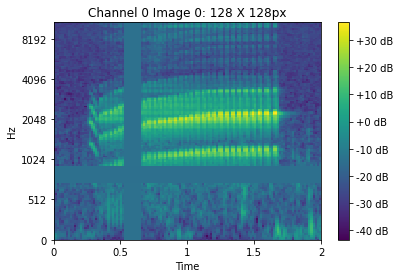

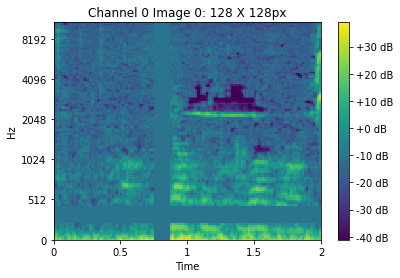

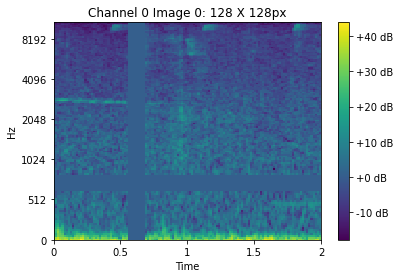

Pale-bellied Tapaculo
White-chinned Thistletail
Slaty-crowned Antpitta


In [0]:
# Create dataloaders and show batch
#dls = dblock.dataloaders(data_folder, bs=64)

dls = dblock.dataloaders(df, bs=64)
dls.show_batch(max_n=3)

Now define the 1-channel input model, find the appropriate learning rate and train the head:

In [0]:
# model = xresnet50(pretrained=True, act_cls=Mish, sa=True, c_in=1, n_out=80) #create custom xresnet: 1 input channel,  80 output nodes, self-attention, Mish activation function
# model = convert_MP_to_blurMP(model, nn.MaxPool2d) # convert MaxPool2D layers to MaxBlurPool

#model = xresnet50(pretrained=True, c_in=1) # create pretrained xresnet with 1 input channel

model = create_cnn_model(xresnet18, pretrained=True, n_in=1, n_out=1000) #create custom model with 1 input and 80 outputs

learn = Learner(dls, 
                model=model, 
                loss_func=CrossEntropyLossFlat(), 
                opt_func = Adam, 
                metrics=accuracy)

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/checkpoints/xrn50_940.pth


In [0]:
learn.summary()

In [0]:
learn.lr_find()

In [0]:
learn.model.cuda()

In [0]:
learn.fit_one_cycle(10, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,7.047843,6.267415,0.070312,26:38


KeyError: ignored

In [0]:
learn.save(f'stage-1_noisy_fold-{fold+1}_sota2')

Fine-tune the model:

In [0]:
learn.unfreeze()

In [0]:
learn.fit_one_cycle(10, lr=3e-3)